# Preprocessing of the data

## Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tqdm.notebook import tqdm
import torch
from torch.utils.data import TensorDataset, DataLoader
import pickle

def save_object(obj, filename):
    with open(filename, 'wb') as outp:  # Overwrites any existing file.
        pickle.dump(obj, outp, pickle.HIGHEST_PROTOCOL)
        
def read_object(filename):
    with open(filename, 'rb') as file:
        data = pickle.load(file)
    return data


## Statistics preprocessing

In this section we applied a preprocessing of the statistics data of the vehicol, converting all the data in float and adding a column for link the frame with the relatives statistics.

In [4]:
data = pd.read_csv('./Data/data.txt', sep = ";", index_col=0, dtype=str)

In [5]:
def converter(array):
    
    def conv(x):
        x = x.replace(",",".")
        return float(x)


    out = list(map(conv, list(map(str, array))))
    
    return out


data["acceleration"] = converter(data["acceleration"].array)
data["speed"] = converter(data["speed"].array)
data["steeringScale"] = converter(data["steeringScale"].array)
data["steeringAngle"] = converter(data["steeringAngle"].array)

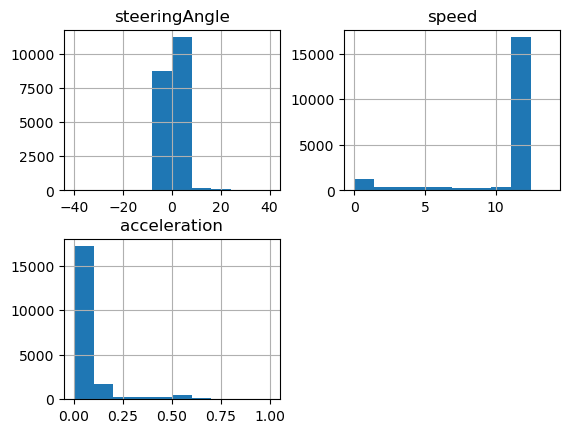

In [6]:
data[['steeringAngle', 'speed', 'acceleration']].hist();

In [7]:
#Select all the images names
images = []

for i in tqdm(range(1, 20407)):
    imgName = f"image{i}.jpg"
    images.append(imgName)
    

  0%|          | 0/20406 [00:00<?, ?it/s]

In [9]:
#We have more frame than statistics usally
data["frames"] = images[:20393]
#data.to_csv("data.csv")

In [10]:
data

,steeringAngle,steeringScale,speed,acceleration,frames
index,,,,,
1,0.0,0.0,0.039338,0.0,image1.jpg
2,0.0,0.0,0.073160,0.0,image2.jpg
3,0.0,0.0,0.057160,0.0,image3.jpg
4,0.0,0.0,0.054395,0.0,image4.jpg
5,0.0,0.0,0.054684,0.0,image5.jpg
...,...,...,...,...,...
20389,0.0,0.0,0.141089,0.0,image20389.jpg
20390,0.0,0.0,0.118273,0.0,image20390.jpg
20391,0.0,0.0,0.093213,0.0,image20391.jpg


## Preprocess of the images

Here we cut the low part of the image.

In [2]:
images = []

for i in tqdm(range(1, 20407)):
    img = cv2.imread(f"./Data/images/image{i}.jpg")
    #img = cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    img = img[:350, :]
    
    images.append(img)
    

  0%|          | 0/20406 [00:00<?, ?it/s]

In [5]:
save_object(images,"./Data/images/images.pkl")